In [10]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

industries = ["IT", "Healthcare", "Finance", "Manufacturing", "Education", "Retail", "Logistics", "Government"]
roles = ["Data Analyst", "Software Engineer", "Manager", "Clerk", "Technician", "Support Staff", "Teacher", "Nurse"]

industry = np.random.choice(industries, n)
job_role = np.random.choice(roles, n)
experience = np.random.randint(0, 25, n)
education_level = np.random.choice(["High School", "Diploma", "Bachelor", "Master"], n)


In [11]:
# Base AI adoption by industry
base_ai = {
    "IT": (0.65, 1.0),
    "Manufacturing": (0.55, 0.9),
    "Finance": (0.5, 0.85),
    "Logistics": (0.45, 0.8),
    "Healthcare": (0.35, 0.7),
    "Retail": (0.35, 0.7),
    "Education": (0.25, 0.6),
    "Government": (0.2, 0.55)
}

In [12]:
ai_adoption = np.array([np.random.uniform(*base_ai[ind]) for ind in industry])

In [13]:
# Role-based automation sensitivity
role_boost = {
    "Clerk": 0.25,
    "Support Staff": 0.2,
    "Technician": 0.1,
    "Data Analyst": 0.05,
    "Software Engineer": -0.05,
    "Manager": -0.1,
    "Teacher": -0.05,
    "Nurse": -0.05
}


In [14]:
automation_risk = ai_adoption * np.random.uniform(0.75, 1.2, n)
automation_risk += np.array([role_boost[r] for r in job_role])
automation_risk = np.clip(automation_risk, 0, 1)


In [15]:
# Skill shift depends on risk + education
edu_effect = {"High School": 0.05, "Diploma": 0.1, "Bachelor": 0.15, "Master": 0.2}
skill_shift = automation_risk + np.random.uniform(-0.15, 0.2, n) + np.array([edu_effect[e] for e in education_level])
skill_shift = np.clip(skill_shift, 0, 1)

In [16]:
# Salary change influenced by skill shift + experience
salary_change = (skill_shift * 45) - 12 + (experience * 0.2) + np.random.uniform(-6, 6, n)

In [17]:
# Replacement probability strongly linked to risk, slightly reduced by experience
job_replace = automation_risk * np.random.uniform(0.65, 1.0, n) - (experience * 0.005)
job_replace = np.clip(job_replace, 0, 1)


In [18]:
df = pd.DataFrame({
    "industry": industry,
    "job_role": job_role,
    "education_level": education_level,
    "experience_years": experience,
    "ai_adoption_level": ai_adoption,
    "automation_risk": automation_risk,
    "skill_shift_level": skill_shift,
    "salary_change_percent": salary_change,
    "job_replacement_probability": job_replace
})

df.head()

,industry,job_role,education_level,experience_years,ai_adoption_level,automation_risk,skill_shift_level,salary_change_percent,job_replacement_probability
0,Logistics,Teacher,Diploma,6,0.639889,0.482573,0.472286,9.168730,0.374303
1,Manufacturing,Software Engineer,Bachelor,16,0.728085,0.802279,1.000000,40.149971,0.700950
2,Education,Software Engineer,Bachelor,19,0.472716,0.440312,0.781299,27.787416,0.227590
3,Logistics,Clerk,Bachelor,3,0.537662,0.778260,1.000000,28.362142,0.697874
4,Finance,Software Engineer,Master,4,0.706455,0.688740,0.758295,17.365126,0.555747


In [27]:
df.to_csv("ai_job_replacement_skill_shift_1000.csv", index=False)
print("Saved as ai_job_replacement_skill_shift_100.csv")

Saved as ai_job_replacement_skill_shift_100.csv


In [21]:
import os

print("Columns:\n", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nFiles in folder:\n", os.listdir())

Columns:
 ['industry', 'job_role', 'education_level', 'experience_years', 'ai_adoption_level', 'automation_risk', 'skill_shift_level', 'salary_change_percent', 'job_replacement_probability']

Info:
<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   industry                     100 non-null    str    
 1   job_role                     100 non-null    str    
 2   education_level              100 non-null    str    
 3   experience_years             100 non-null    int32  
 4   ai_adoption_level            100 non-null    float64
 5   automation_risk              100 non-null    float64
 6   skill_shift_level            100 non-null    float64
 7   salary_change_percent        100 non-null    float64
 8   job_replacement_probability  100 non-null    float64
dtypes: float64(5), int32(1), str(3)
memory usage: 6.8 KB
None

Describe

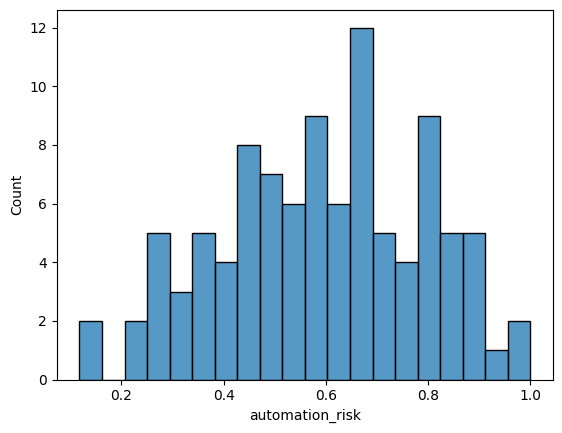

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['automation_risk'], bins=20)
plt.show()

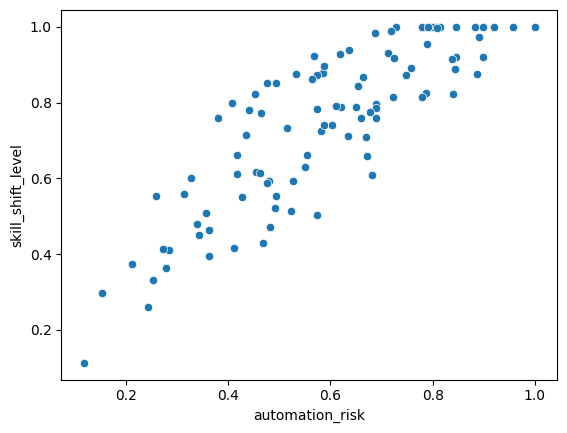

In [23]:
sns.scatterplot(x='automation_risk', y='skill_shift_level', data=df)
plt.show()

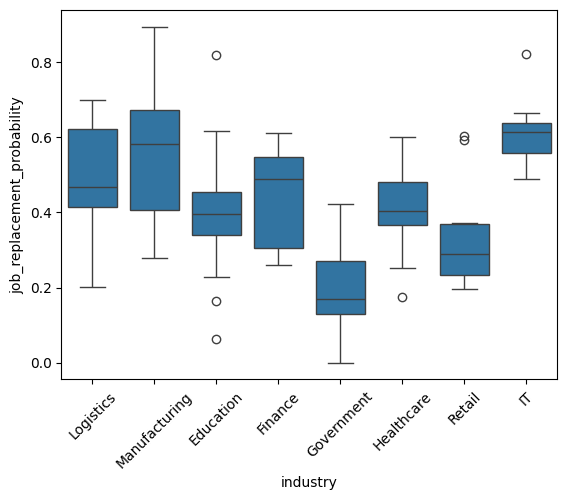

In [24]:
sns.boxplot(x='industry', y='job_replacement_probability', data=df)
plt.xticks(rotation=45)
plt.show()

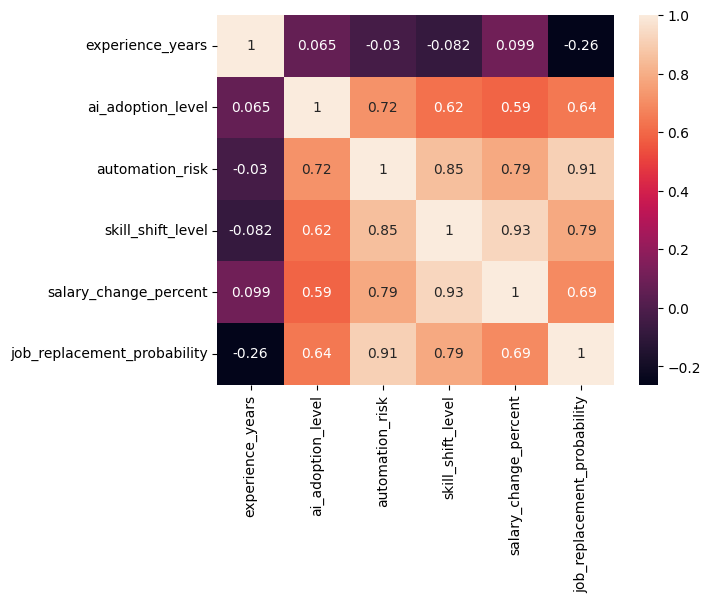

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()